# I. Loading/Creating dataframes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from openpyxl import Workbook

df = pd.read_excel("bank.xlsx")


def date_to_float(date_data):
    return (date_data - date_data.min())  / np.timedelta64(1,'D')

df["DATE DAYS"] = date_to_float(df["VALUE DATE"])
dates = pd.Series(df["DATE"])
df["YEAR"] = dates.dt.year
df["MONTH"] = dates.dt.month
df["WEEK"] = dates.dt.isocalendar().week
df["DAY"] = dates.dt.day
df["DAYOFWEEK"] = dates.dt.dayofweek
df["Account No"] = df["Account No"].replace(df["Account No"].unique(),["A","B","C","D","E","F","G","H","I","J"])

# II. Statistical metrics 

In [2]:
# df: Imported data
# account_data: Statistical metrics for each account
# deposits/withdrawals: Number of deposits/withdrawals for each account according to the date

accounts = df["Account No"].unique()
balance_mins, balance_maxs, balance_means, balance_meds, deposit_mins, deposit_maxs, deposit_means, deposit_number, deposit_meds, withdrawal_mins, withdrawal_maxs, withdrawal_means, withdrawal_number, withdrawal_meds = [], [], [], [], [], [], [], [], [], [], [], [], [], []
for acc in accounts:
    balance_mins.append(df[df["Account No"] == acc][["BALANCE AMT"]].min().values[0])
    balance_maxs.append(df[df["Account No"] == acc][["BALANCE AMT"]].max().values[0])
    balance_means.append(df[df["Account No"] == acc][["BALANCE AMT"]].mean().values[0])
    balance_meds.append(df[df["Account No"] == acc][["BALANCE AMT"]].median().values[0])

    deposit_mins.append(df[df["Account No"] == acc][["DEPOSIT AMT"]].min().values[0])
    deposit_maxs.append(df[df["Account No"] == acc][["DEPOSIT AMT"]].max().values[0])
    deposit_means.append(df[df["Account No"] == acc][["DEPOSIT AMT"]].mean().values[0])
    deposit_number.append(df[df["Account No"] == acc][["DEPOSIT AMT"]].count().values[0])
    deposit_meds.append(df[df["Account No"] == acc][["DEPOSIT AMT"]].median().values[0])

    withdrawal_mins.append(df[df["Account No"] == acc][["WITHDRAWAL AMT"]].min().values[0])
    withdrawal_maxs.append(df[df["Account No"] == acc][["WITHDRAWAL AMT"]].max().values[0])
    withdrawal_means.append(df[df["Account No"] == acc][["WITHDRAWAL AMT"]].mean().values[0])
    withdrawal_number.append(df[df["Account No"] == acc][["WITHDRAWAL AMT"]].count().values[0])
    withdrawal_meds.append(df[df["Account No"] == acc][["WITHDRAWAL AMT"]].median().values[0])



account_data = pd.DataFrame(list(zip(accounts, deposit_number, deposit_mins, deposit_maxs, deposit_means, deposit_meds, withdrawal_number, withdrawal_mins, withdrawal_maxs, withdrawal_means, withdrawal_meds, balance_mins, balance_maxs, balance_means, balance_meds)),
                           columns=["Account No","DEPOSIT N°","DEPOSIT MIN", "DEPOSIT MAX", "DEPOSIT MEAN", "DEPOSIT MEDIAN", "WITHDRAWAL N°", "WITHDRAWAL MIN", "WITHDRAWAL MAX","WITHDRAWAL MEAN", "WITHDRAWAL MEDIAN", "BALANCE MIN", "BALANCE MAX", "BALANCE MEAN", "BALANCE MEDIAN"]).round()
account_data

,Account No,DEPOSIT N°,DEPOSIT MIN,DEPOSIT MAX,DEPOSIT MEAN,DEPOSIT MEDIAN,WITHDRAWAL N°,WITHDRAWAL MIN,WITHDRAWAL MAX,WITHDRAWAL MEAN,WITHDRAWAL MEDIAN,BALANCE MIN,BALANCE MAX,BALANCE MEAN,BALANCE MEDIAN
0,A,315,1320.0,3000000.0,463046.0,500000.0,778,120.0,912000.0,186886.0,115705.0,1.383550e+05,8.500000e+06,1.478073e+06,1.261196e+06
1,B,469,1.0,1000000.0,203964.0,200000.0,575,2.0,2500000.0,165875.0,112779.0,4.631860e+05,3.273973e+06,9.981640e+05,9.462800e+05
2,C,774,1.0,15000000.0,34925.0,5000.0,28,1.0,354000000.0,13732508.0,90784.0,-3.592701e+08,1.901582e+06,-4.703390e+06,1.092580e+06
3,D,23,500.0,202100000.0,9947183.0,250000.0,28,21.0,170000000.0,15011353.0,2110292.0,-5.587520e+08,-3.564159e+08,-4.766824e+08,-5.467218e+08
4,E,3255,0.0,170250000.0,1445745.0,727827.0,1333,0.0,240000000.0,3530046.0,2000000.0,-5.482747e+08,-3.080176e+08,-5.437807e+08,-5.459235e+08
5,F,787,0.0,15000000.0,129872.0,108.0,5227,0.0,15000000.0,19247.0,3000.0,-5.475391e+08,-4.798730e+08,-5.447039e+08,-5.452666e+08
6,G,5063,0.0,544800000.0,3397676.0,8949.0,8391,0.0,400000000.0,2049348.0,2020.0,-5.463142e+08,-1.514640e+06,-5.294276e+08,-5.319314e+08
7,H,5511,1.0,500000000.0,8324966.0,6500000.0,5025,0.0,459447546.0,9338476.0,10000000.0,-2.045201e+09,-5.399234e+08,-1.523125e+09,-1.536200e+09
8,I,32092,1.0,211959442.0,2130827.0,313510.0,16687,0.0,150000000.0,4103963.0,500000.0,-1.819376e+09,-1.470464e+09,-1.669130e+09,-1.680812e+09
9,J,14363,0.0,200000000.0,7082151.0,5000000.0,15477,1.0,141366239.0,6586232.0,57882.0,-1.996536e+09,-1.113805e+09,-1.771448e+09,-1.847921e+09


## 

# III. Temporal evolution

## 1. General comparison

In [23]:
ax = 0
for acc in accounts:
    if ax == 0:
        ax = df[df["Account No"] == acc][["Account No","VALUE DATE","BALANCE AMT"]].rename(columns={"BALANCE AMT":acc}).groupby(["VALUE DATE"])
        # .mean().plot(ylabel="BALANCE",ylim=(-2500000000,1000000000), figsize=(10,10))
    else :
        df[df["Account No"] == acc][["Account No","VALUE DATE","BALANCE AMT"]].rename(columns={"BALANCE AMT":acc}).groupby(["VALUE DATE"])
        # .mean().plot(ax=ax, ylabel="BALANCE", ylim=(-2500000000,1000000000), figsize=(10,10)).set_title("Accounts balance evolution over the period")
                

In [24]:
df.dtypes

Account No                     object
DATE                   datetime64[ns]
TRANSACTION DETAILS            object
CHQ.NO.                       float64
VALUE DATE             datetime64[ns]
WITHDRAWAL AMT                float64
DEPOSIT AMT                   float64
BALANCE AMT                   float64
.                              object
DATE DAYS                     float64
YEAR                            int32
MONTH                           int32
WEEK                           UInt32
DAY                             int32
DAYOFWEEK                       int32
dtype: object

In [4]:
ax = 0
for acc in accounts:
    if ax == 0:
        ax = df[df["Account No"] == acc][["Account No","VALUE DATE","BALANCE AMT"]].rename(columns={"BALANCE AMT":acc}).groupby(["VALUE DATE"]).mean().plot(ylabel="BALANCE",ylim=(-2500000000,1000000000), figsize=(10,10))
    else :
        df[df["Account No"] == acc][["Account No","VALUE DATE","BALANCE AMT"]].rename(columns={"BALANCE AMT":acc}).groupby(["VALUE DATE"]).mean().plot(ax=ax, ylabel="BALANCE", ylim=(-2500000000,1000000000), figsize=(10,10)).set_title("Accounts balance evolution over the period")
                

TypeError: agg function failed [how->mean,dtype->object]

## 2. Transaction density

In [26]:
for acc in accounts:
    df[df["Account No"] == acc][["Account No","VALUE DATE","BALANCE AMT"]].rename(columns={"BALANCE AMT": "transaction day"}).groupby(["VALUE DATE"]).mean().plot(ylabel="BALANCE",style=".-",figsize=(10,10), title="Averaged balance and transaction density over the period - Account " + acc )

TypeError: agg function failed [how->mean,dtype->object]

## 3. Transaction periodicity

In [27]:
# deposits_percent/withdrawals_percent: Proportion of deposits/withdrawals (out of respective total) for each account by date

deposits = []
for acc in accounts:
    deposits.append(df[df["Account No"] == acc][["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK","DEPOSIT AMT"]].rename(columns={"DEPOSIT AMT":acc+" : DEPOSIT N°"}).groupby(["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK"]).count())
deposits = pd.concat(deposits)

deposits_percent = deposits
tot = deposits.groupby("MONTH").sum().sum(axis=0).to_numpy()
i = 0
for column in deposits:
    deposits_percent[column] = deposits[column]/tot[i]
    i = i + 1
    
withdrawals = []
for acc in accounts:
    withdrawals.append(df[df["Account No"] == acc][["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK","WITHDRAWAL AMT"]].rename(columns={"WITHDRAWAL AMT":acc+" : WITHDRAWAL N°"}).groupby(["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK"]).count())
withdrawals = pd.concat(withdrawals)

withdrawals_percent = withdrawals
tot = withdrawals.groupby("MONTH").sum().sum(axis=0).to_numpy()
i = 0
for column in withdrawals:
    withdrawals_percent[column] = withdrawals[column]/tot[i]
    i = i + 1


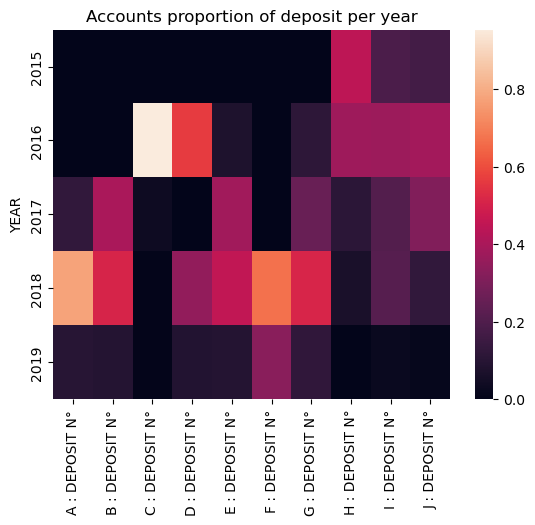

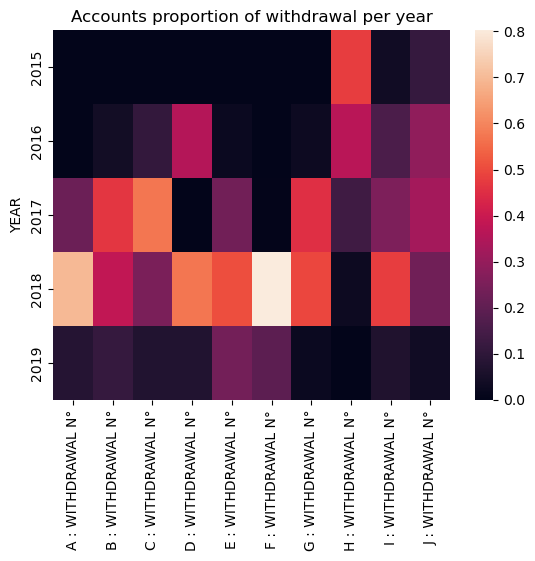

In [28]:
ax = plt.axes()
sns.heatmap(deposits_percent.groupby("YEAR").sum(), ax=ax)
ax.set_title("Accounts proportion of deposit per year")
plt.show()

ax = plt.axes()
sns.heatmap(withdrawals_percent.groupby("YEAR").sum(), ax=ax)
ax.set_title("Accounts proportion of withdrawal per year")
plt.show()

In [29]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

balances = []
for acc in accounts:
    balances.append(df[df["Account No"] == acc][["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK","BALANCE AMT"]].rename(columns={"BALANCE AMT":acc+" : BALANCE MEAN"}).groupby(["VALUE DATE","YEAR","MONTH","DAY","DAYOFWEEK"]).mean())
balances = pd.concat(balances)
balances_proportion = balances
for col in balances_proportion.columns:
    balances_proportion[col] = absolute_maximum_scale(balances[col])

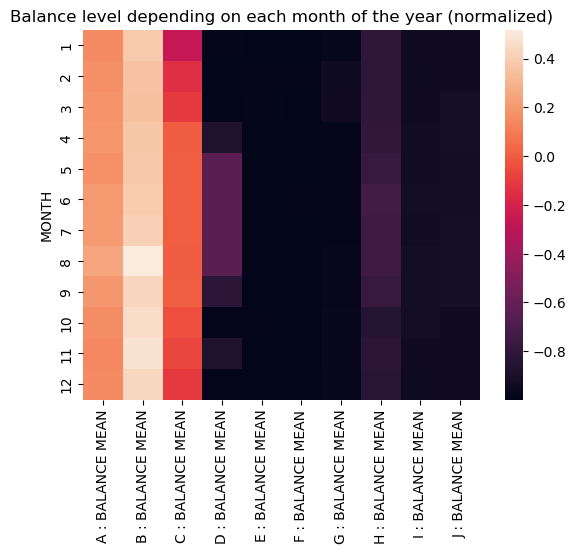

In [30]:
ax = plt.axes()
sns.heatmap(balances_proportion.groupby("MONTH").mean(), ax=ax)
ax.set_title("Balance level depending on each month of the year (normalized)")
plt.show()

# ML Model : Predict the balance of an account based on a given date


In [31]:
from xgboost import XGBRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import sklearn.metrics

In [32]:
def balance_prediction(account_no):
    X = df[df["Account No"] == account_no][["YEAR","MONTH","WEEK","DAYOFWEEK","DAY"]].drop_duplicates().to_numpy()
    y = df[df["Account No"] == account_no][["YEAR","MONTH","WEEK","DAYOFWEEK","DAY","BALANCE AMT"]].groupby(["YEAR","MONTH","WEEK","DAYOFWEEK","DAY"]).mean().to_numpy()
    #x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, stratify=[element > 1 for element in y.values])

    params = {
    "n_estimators": 500,
    "max_depth": 10,
    "learning_rate": 0.01,
    }
    lm = XGBRegressor()

    kf = KFold(n_splits=5, random_state=None, shuffle=True)

    for train_index , test_index in kf.split(X):
        X_train , X_test = X[train_index,:],X[test_index,:]
        y_train , y_test = y[train_index] , y[test_index]

        lm.fit(X_train,y_train)
        pred_values = lm.predict(X_test)
        
        r2 = f"R2 score: {r2_score(y_test[:,0], pred_values)}"
        print(r2)
        Val = pd.DataFrame({"ACTUAL": y_test[:,0], "PREDICTED": pred_values})
        Val.sort_values("ACTUAL").reset_index()[["ACTUAL", "PREDICTED"]].plot(title="Account : " + account_no, xlabel =r2)
        

Attention : la cellule suivante affiche **pour chaque split sur chaque compte** :

    1. les R2 scores
    2. les comparaisons des données de test et de prédiction
    


Account : A
R2 score: 0.5162073305212329
R2 score: 0.19928879400415866
R2 score: 0.41118622715507547
R2 score: 0.02700141793270827
R2 score: 0.10377329152234538

Account : B
R2 score: 0.5842302345141099
R2 score: 0.5673127459549732
R2 score: 0.5044373376024542
R2 score: 0.49391106598000856
R2 score: 0.5271371463127655

Account : C
R2 score: 0.6647874593928484
R2 score: 0.9512198016581919
R2 score: 0.9357414167863791
R2 score: 0.7208484025762127
R2 score: 0.7235860161384606

Account : D
R2 score: 0.8818818901118695
R2 score: 0.9841685580736085
R2 score: -0.27721420282418663
R2 score: 0.3659203243379159
R2 score: 0.9683397496576717

Account : E
R2 score: 0.21631334043473505
R2 score: 0.8767947854382114


/Users/vamsi/anaconda3/envs/wydo/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:513: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


R2 score: 0.25020792588260066
R2 score: -5.439798489081054
R2 score: 0.4640877125384858

Account : F
R2 score: 0.9790158086803085
R2 score: -16.476840203004564
R2 score: 0.08434658701975206
R2 score: 0.8303307569811931
R2 score: 0.8433078209045998

Account : G
R2 score: 0.911927979824228
R2 score: 0.8940547780532181
R2 score: 0.6014056052233762
R2 score: 0.6757532031062994
R2 score: 0.6926884917742315

Account : H
R2 score: 0.9781593797330528
R2 score: 0.96948145602547
R2 score: 0.956487953570587
R2 score: 0.9818730220371327
R2 score: 0.9827035134615557

Account : I
R2 score: 0.8116676799131529
R2 score: 0.8425170685563255
R2 score: 0.8601455505037356
R2 score: 0.838483380121309
R2 score: 0.8267036715994597

Account : J
R2 score: 0.9473780597248191
R2 score: 0.9504451800984878
R2 score: 0.9506340079929305
R2 score: 0.9341026086701048
R2 score: 0.9124594317602421


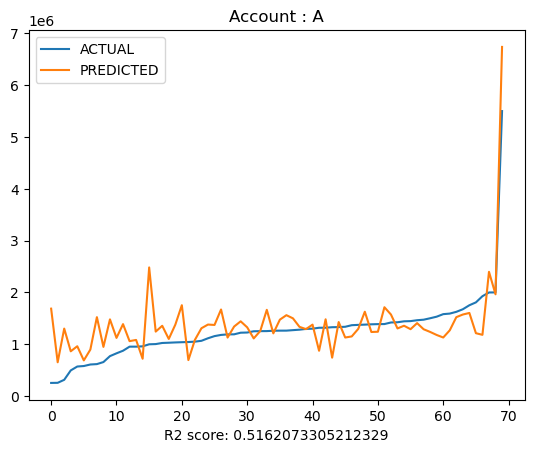

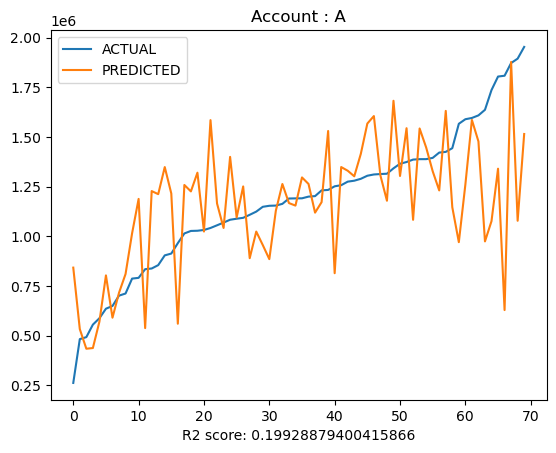

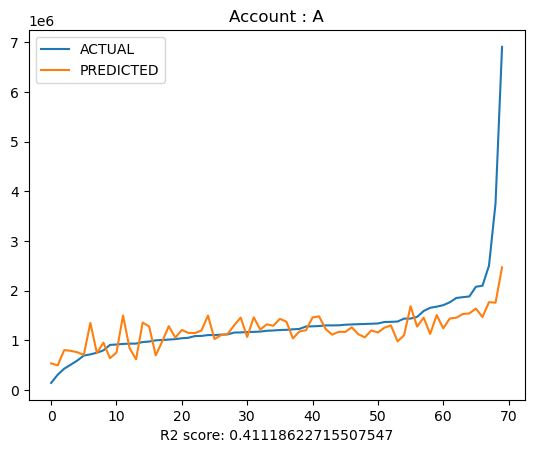

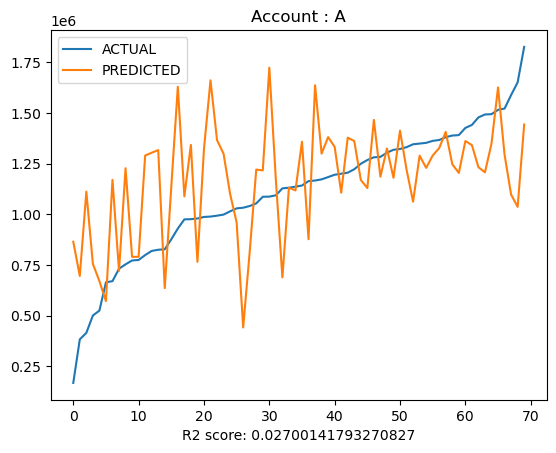

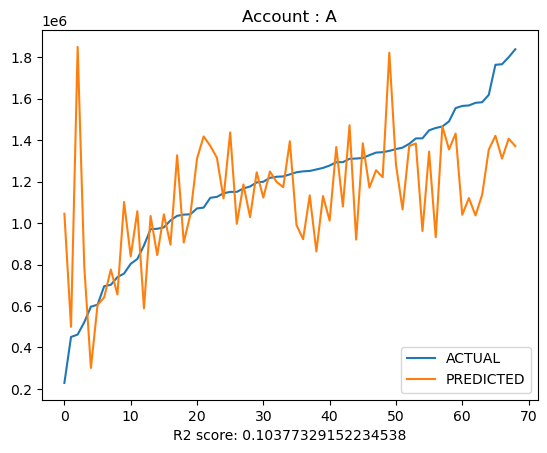

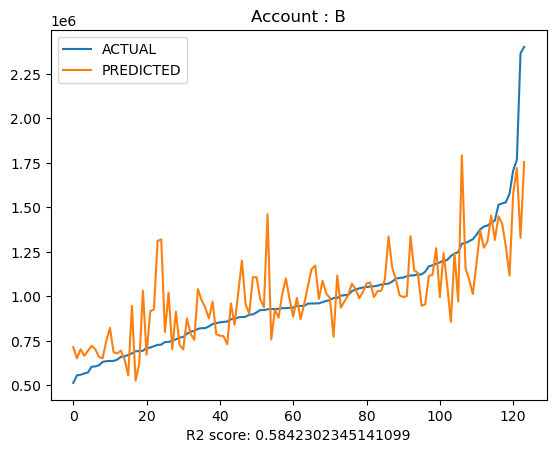

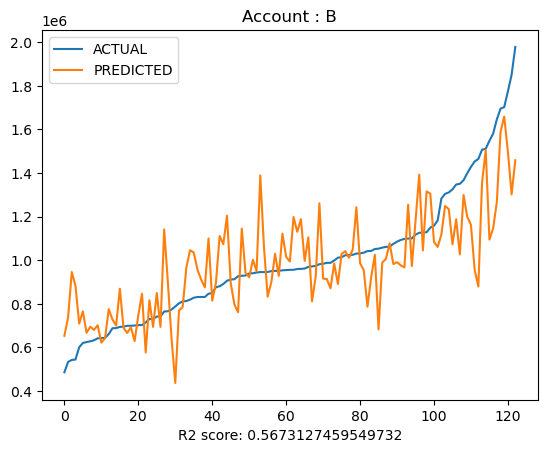

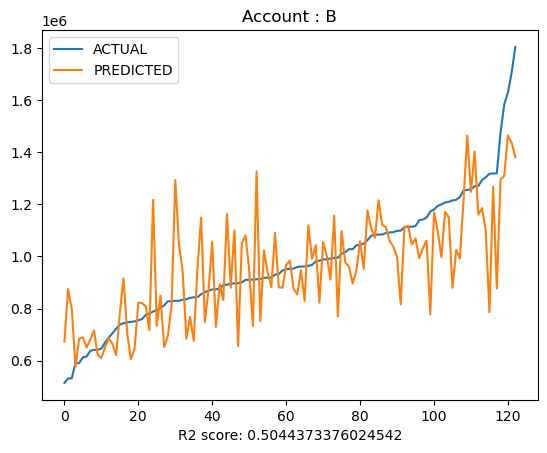

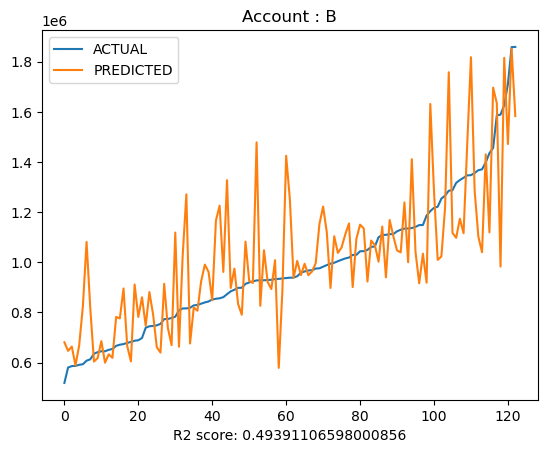

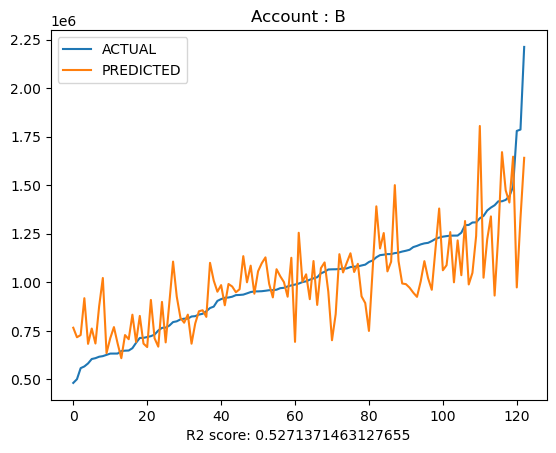

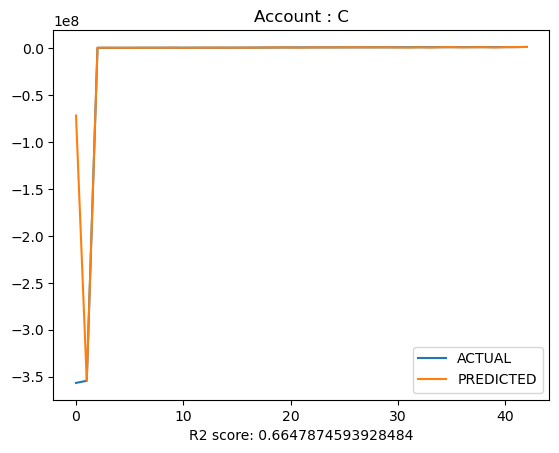

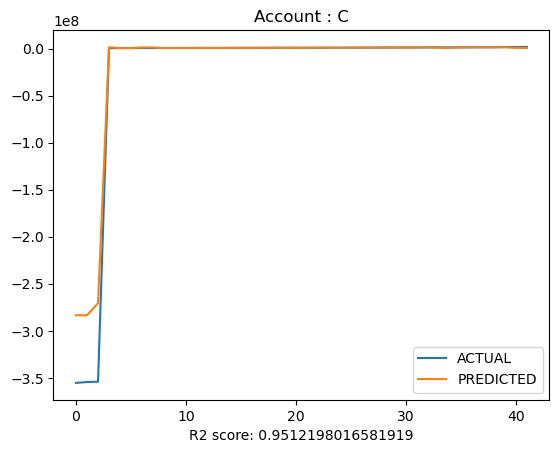

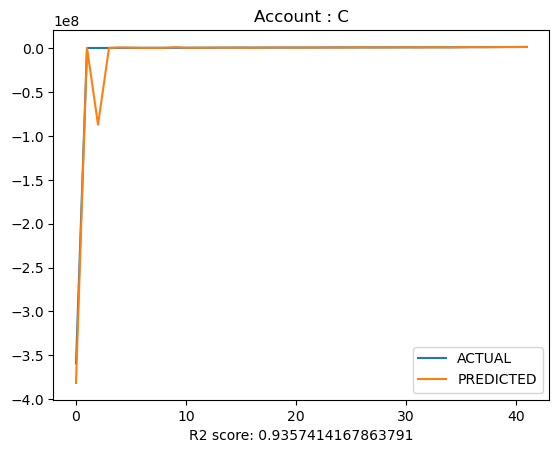

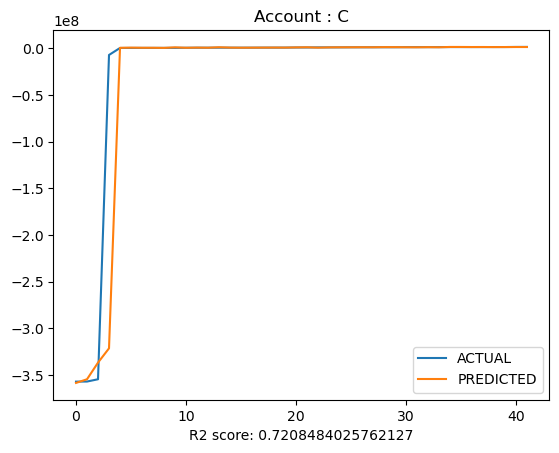

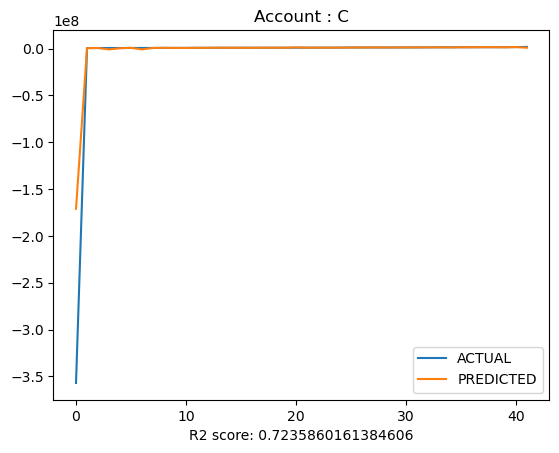

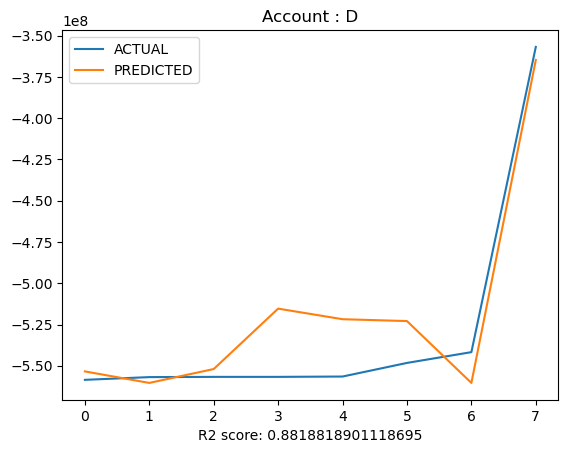

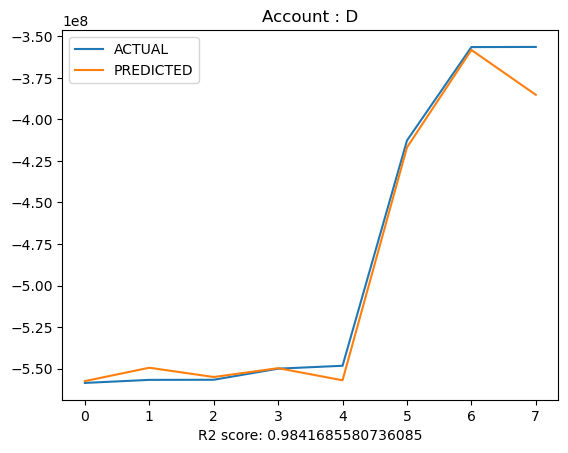

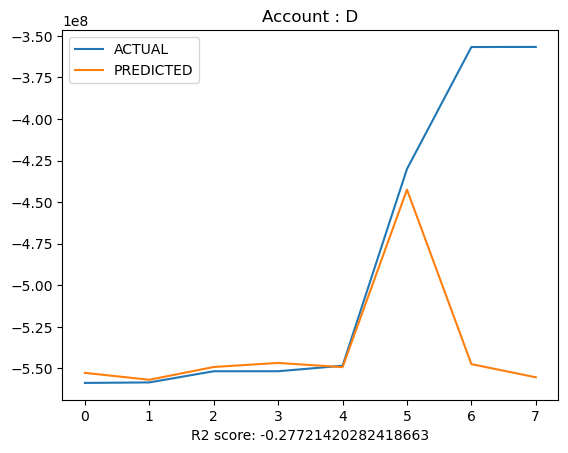

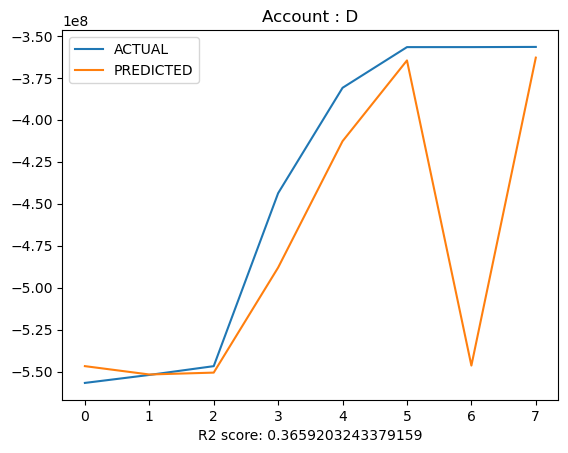

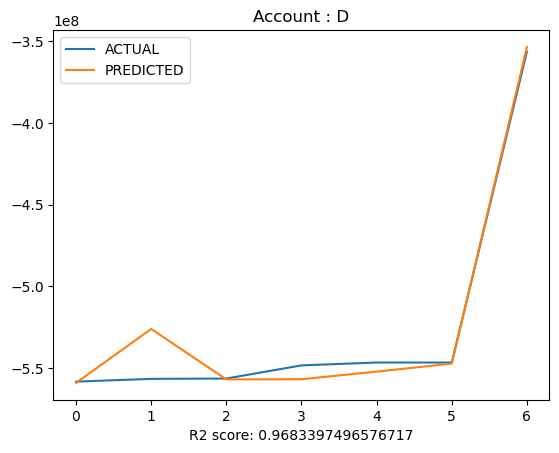

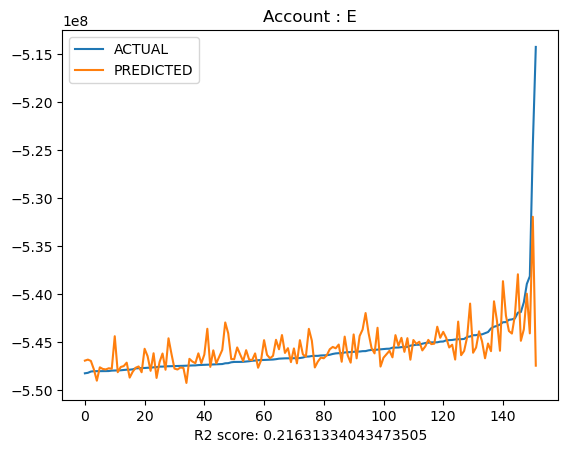

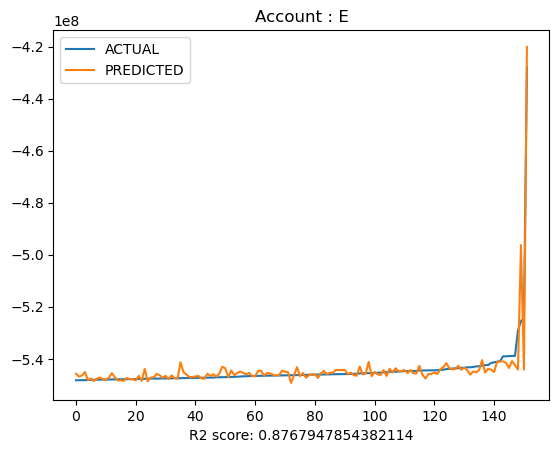

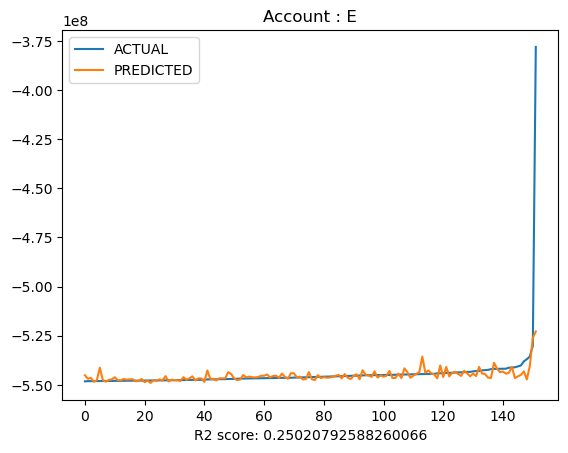

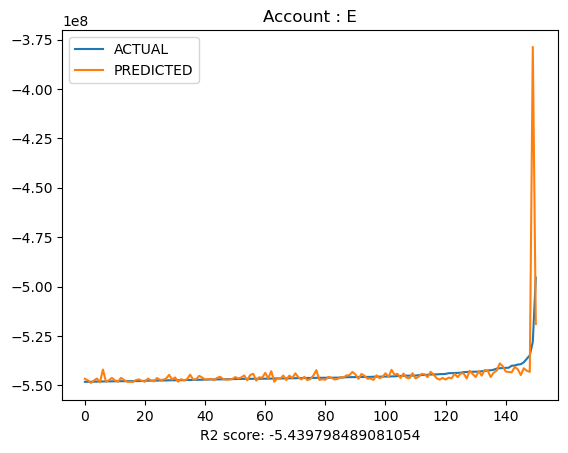

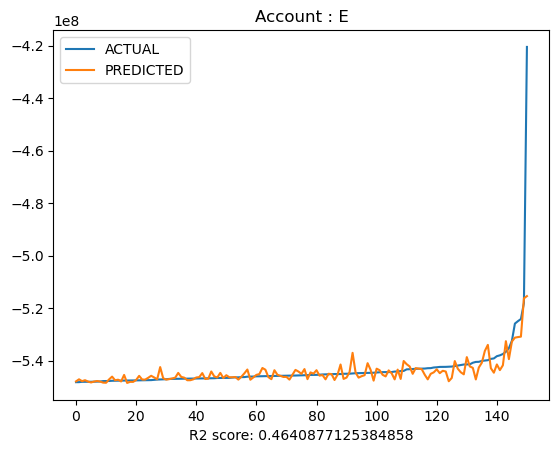

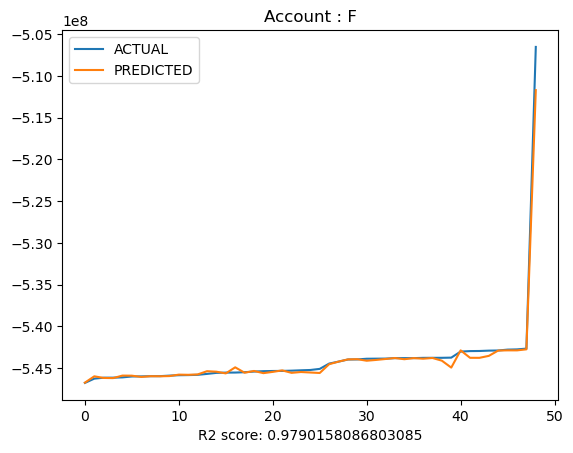

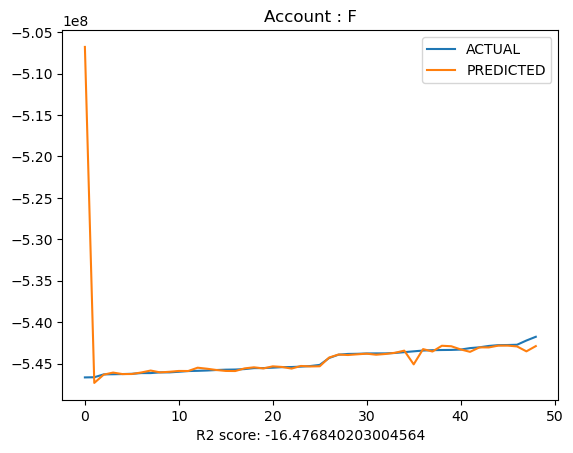

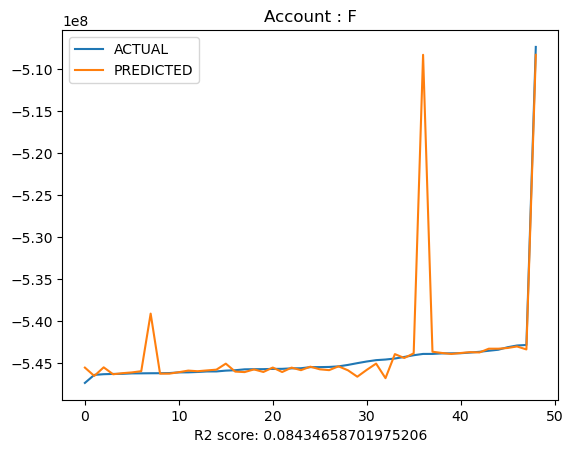

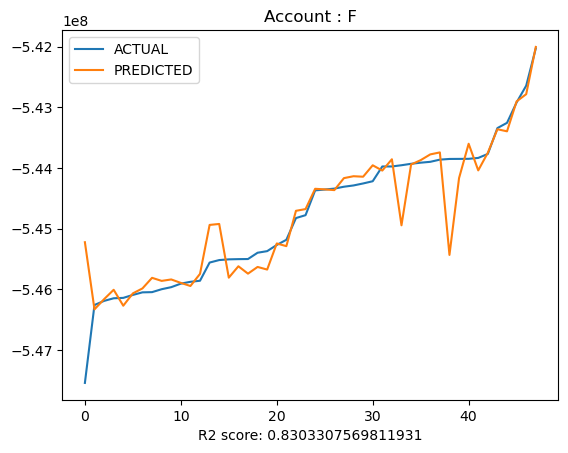

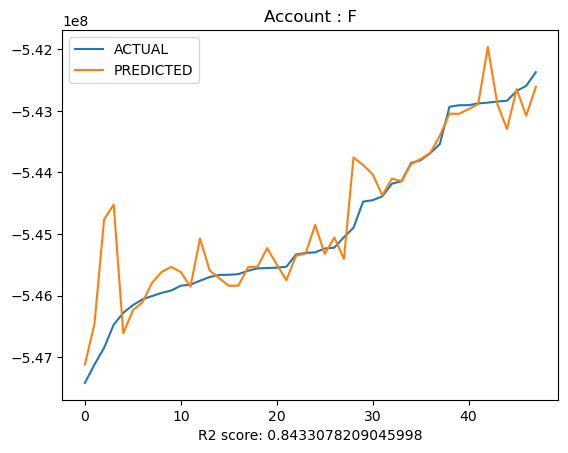

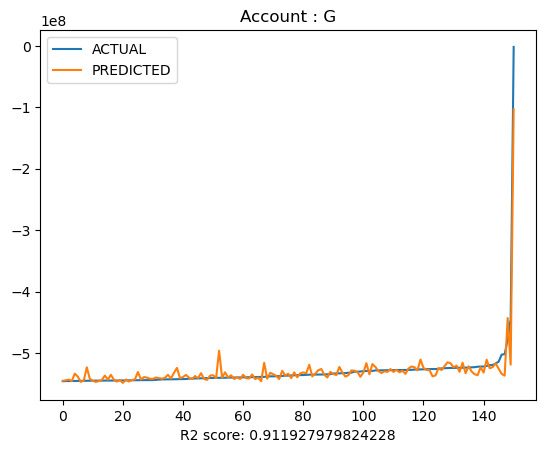

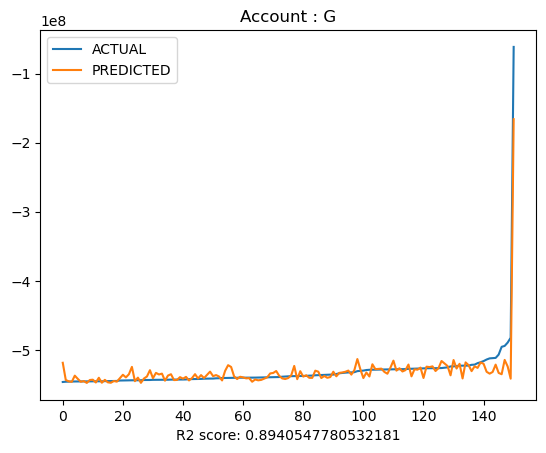

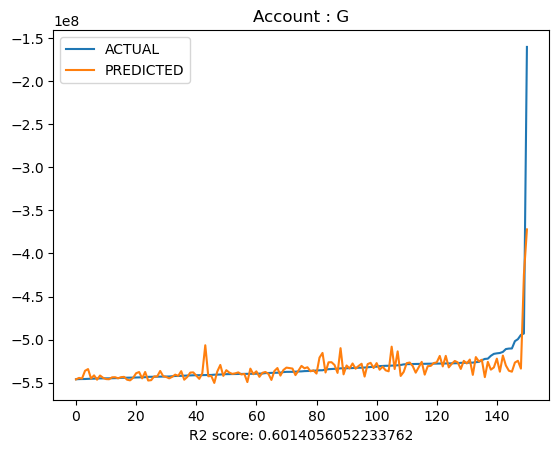

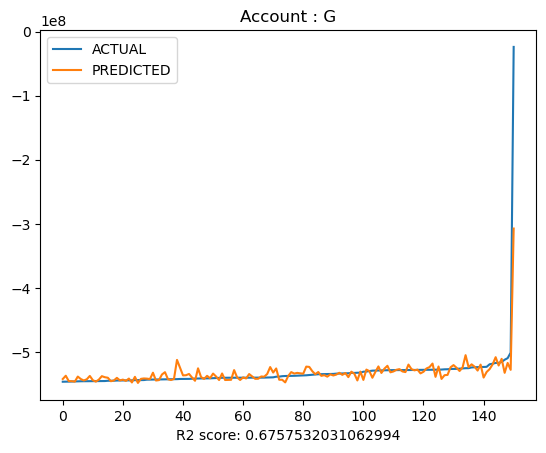

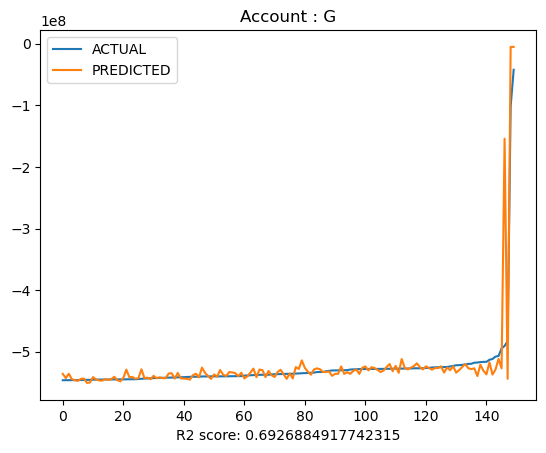

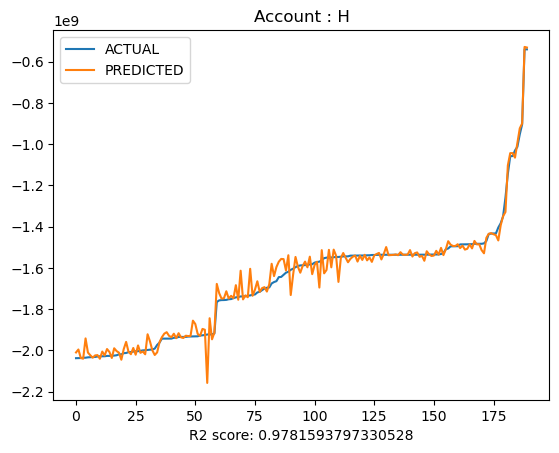

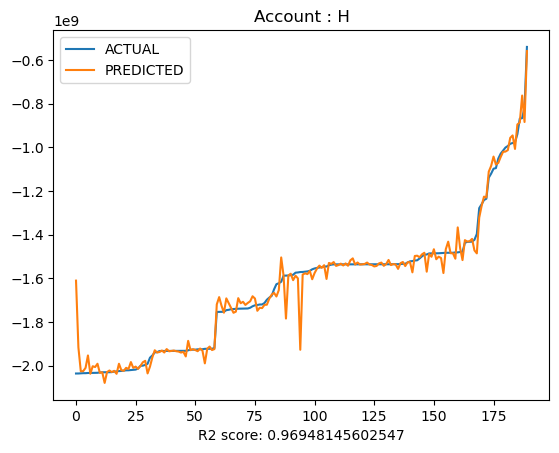

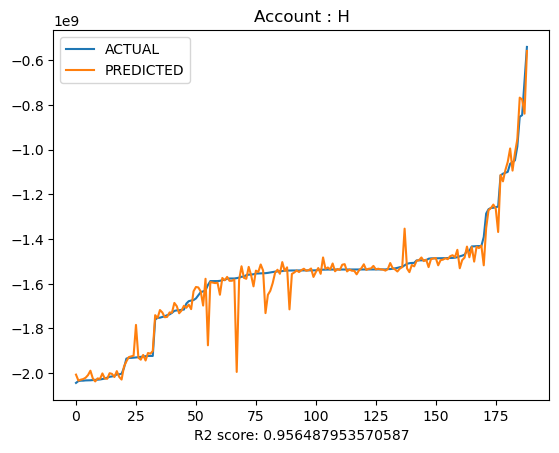

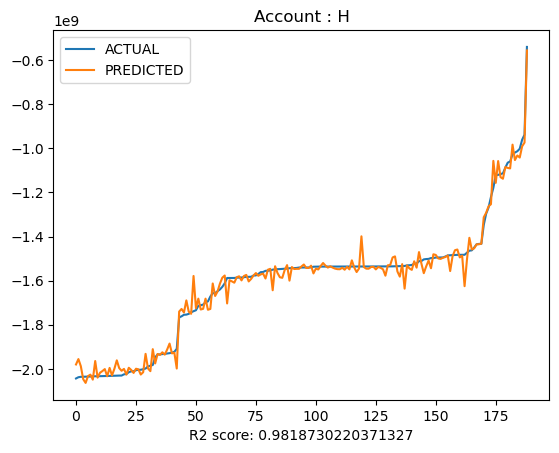

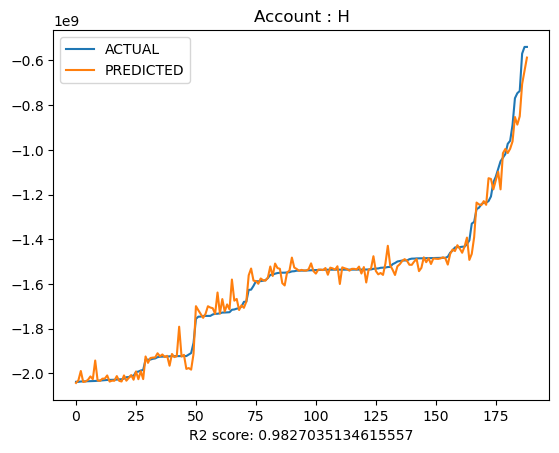

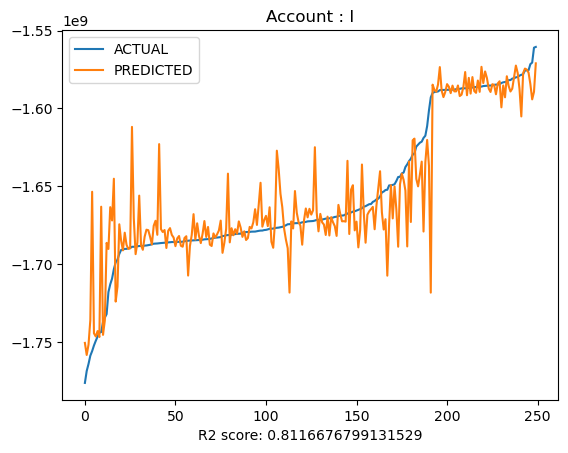

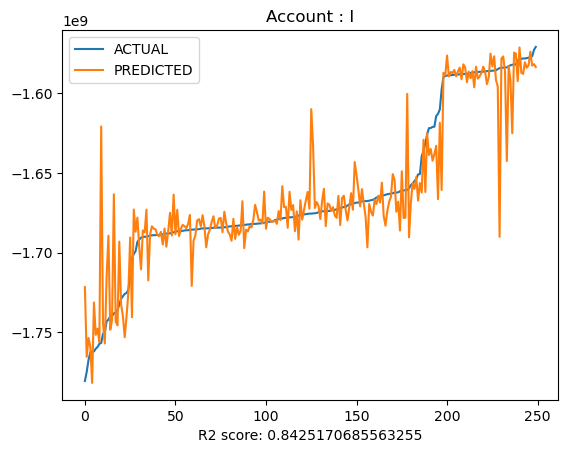

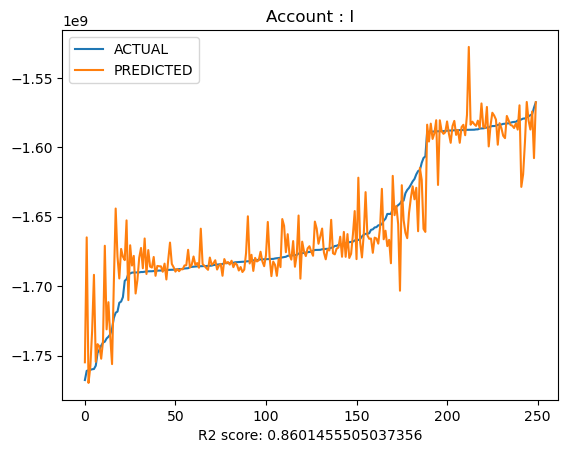

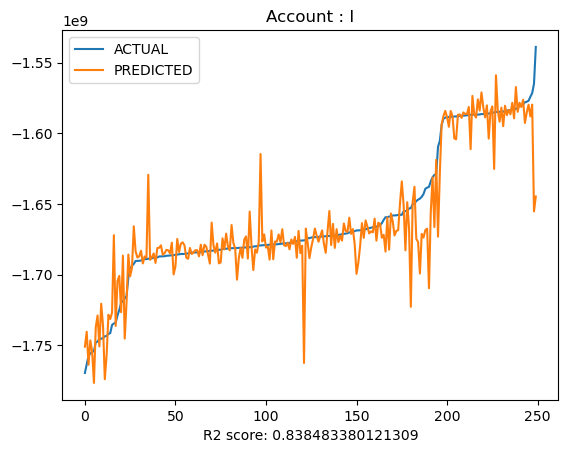

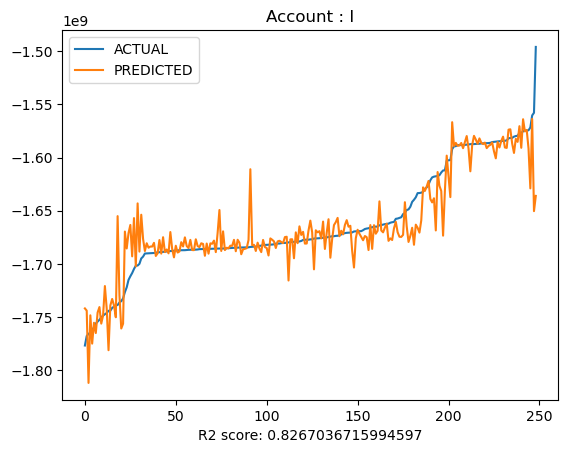

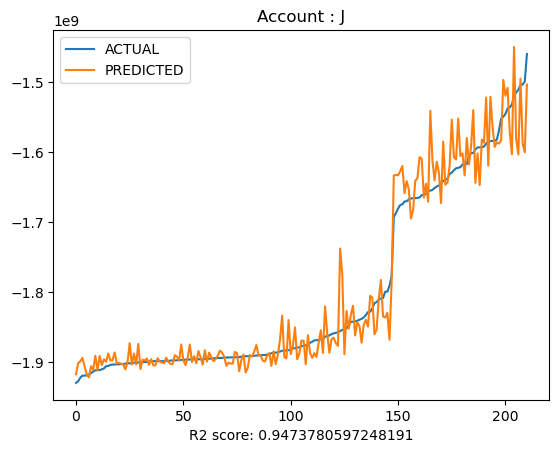

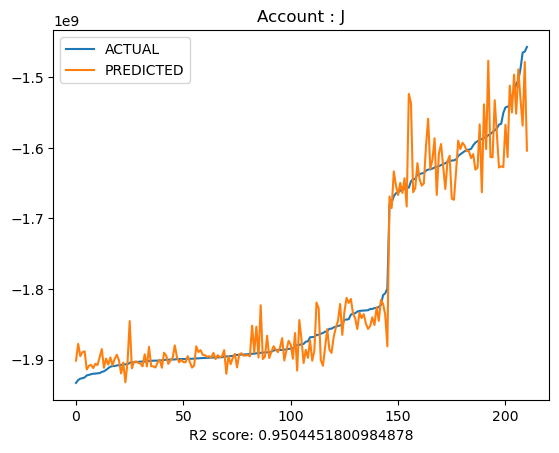

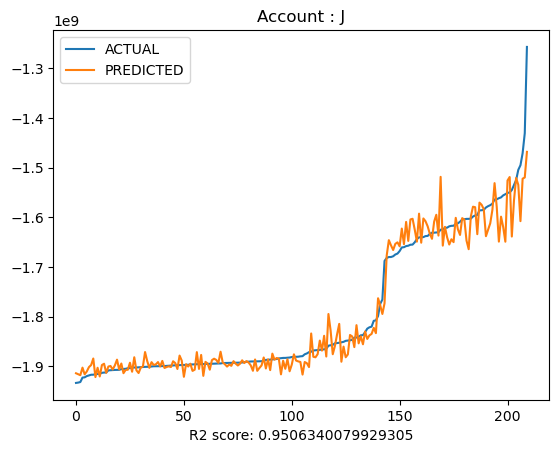

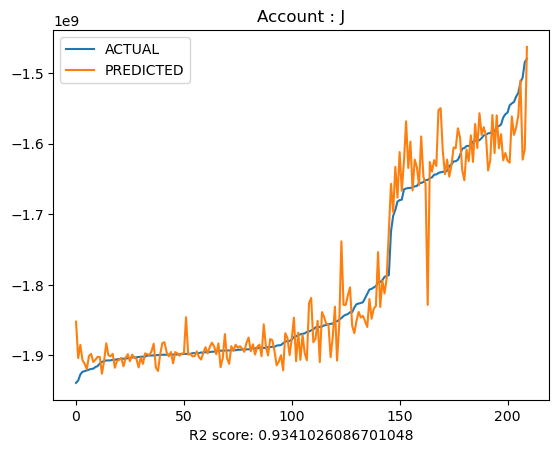

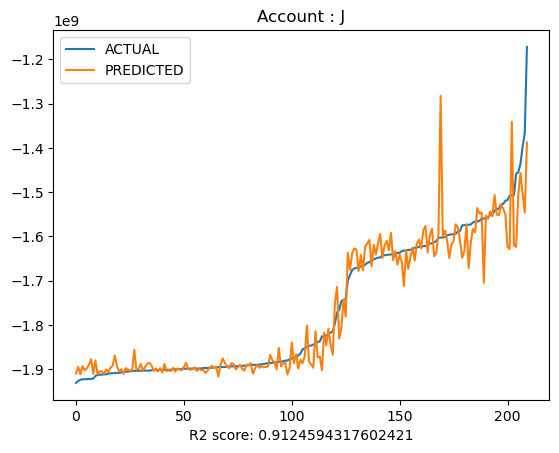

In [33]:
for acc in accounts:
    print("\nAccount : " + acc)
    balance_prediction(acc)

## Notes

Modélisation très simple en l'état. Il faudrait faire une grid search pour optimiser les hyperparamètres ; notamment pour certains des modèles entraînés sur des petits jeux de données et/ou contenant peu de variations par ailleurs très brusques.

Après comparaison, les résultats avec XGBoost sont généralement meilleurs qu'avec une RandomForest.

Un LSTM ou bi-LSTM pourrait aussi être une piste pertinente pour les séries temporelles.